## 简单的神经网路

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from tensorflow.python.framework import ops

### 从MNIST导入数据
+ 因为我们习惯的维度表示是$(n_x, m)$，$n_x$是输入的feature数量,$m$是数据集的个数，所以我们将原本的矩阵转置一下

In [189]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [190]:
X_train = mnist.train.images.T
Y_train = mnist.test.labels.T

### 初始化```learning_rate```，```epoch_num```等hyperparameter

In [191]:
learning_rate = 0.01
epoch_num = 5000
batch_size = 128
layer_dims = [X_train.shape[0], 50, 10]
L = len(layer_dims)

### 初始化```X，Y```占位符和```W，b```参数
+ $W^{[l]}$参数的维度是$(n^{[l]}, n^{[l-1]})$, $b^{[l]}$参数的维度是$(n^{[l]}, 1)$
+ 用Xavier Initializer初始化$W$

In [192]:
ops.reset_default_graph() 
X = tf.placeholder(tf.float32, [X_train.shape[0], None])
Y = tf.placeholder(tf.float32, [Y_train.shape[0], None])

W = [None for i in range(L)]
b = [None for i in range(L)]
for l in range(1, L):
    W[l] = tf.get_variable("W"+str(l), [layer_dims[l], layer_dims[l-1]], 
                             initializer = tf.contrib.layers.xavier_initializer())
    b[l] = tf.get_variable("b"+str(l), [layer_dims[l], 1],
                             initializer = tf.zeros_initializer())

### 正向传播
+ 因为用TensorFlow可以自动解决反向传播的求导和权值更新，我们只需要写好正向传播

In [193]:
def forward():
    A = X
    for i in range(1, L):
        Z = tf.matmul(W[i], A) + b[i]
        A = tf.nn.relu(Z)
    return Z

### 计算```cost```, ```optimize```和准确率```accuracy```

In [194]:
Y_hat = forward()

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=tf.transpose(Y_hat), labels=tf.transpose(Y)))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

predict = tf.equal(tf.argmax(Y_hat), tf.argmax(Y))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

### 训练和结果

In [195]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
c_list = []
for epoch in tqdm(range(epoch_num)):
    X_train, Y_train = mnist.train.next_batch(batch_size)
    _, c = sess.run([optimizer, cost], feed_dict={X: X_train.T, Y: Y_train.T})
    c_list.append(c)
print("cost: ", c)
print("accuracy: ", sess.run(accuracy, feed_dict={X: mnist.test.images.T, Y: mnist.test.labels.T}))

100%|██████████| 5000/5000 [00:12<00:00, 402.60it/s]


cost:  0.0281202
accuracy:  0.9627


### 训练过程中```cost```的变化

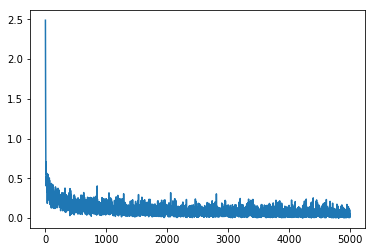

In [196]:
plt.plot(c_list)

### 画出```test```中10个预测结果

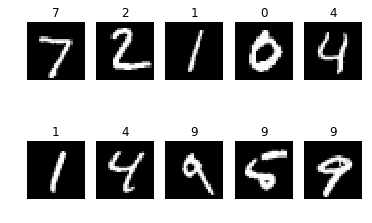

In [197]:
Y_ = sess.run(tf.argmax(Y_hat), feed_dict={X: mnist.test.images.T[:, :10], Y: mnist.test.labels.T[:, :10]})
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mnist.test.images.T[:, i].reshape(28, 28), plt.cm.gray)
    plt.title(str(Y_[i]))
    plt.axis('off')